# Tensorflows Image Recognition of handwritten digits

## Machine learning
<img src=machine-learning-supervised-vs-unsupervised-learning.png/>

In our daily life... __google search suggested result__, __typos correction__, __spam email filter__

### Regression example: 
Can we estimate property prices from their superficies?
<img src=regression.png />

## Deep Learning and Neural Networks

## Reading
How does the human mind recognize hand writing?

In [98]:
from IPython.display import Image
# Image(filename='1.png') 
# Image(filename='2.png') 
# Image(filename='B.png') 



### The training set

For hand written digits, we use a database of freely available photos called __MNIST__: Mixed National Institute of Standards and Technology

A MNIST data point has two parts: an __image__ of a handwritten digit and a corresponding __label__. We'll call the images "x" and the labels "y". Both the training set and test set contain images and their corresponding labels; for example the training images are `mnist.train.images` and the training labels are `mnist.train.labels`.

The labels represent the digits.. 0 to 9, the images represent a matrix  (28x28 = 784) of numbers to represent the shades of grey:
<img src=https://www.tensorflow.org/images/MNIST-Matrix.png width="60%" height="60%" />

The MNIST data is split into three parts: 55,000 data points of training data (`mnist.train`), 10,000 points of test data (`mnist.test`), and 5,000 points of validation data (`mnist.validation`). This split is very important: it's essential in machine learning that we have separate data which we don't learn from so that we can make sure that what we've learned actually generalizes!
<img src=https://www.tensorflow.org/images/mnist-train-xs.png width="35%" height="35%" />
The result is that `mnist.train.images` is a tensor (an n-dimensional array) with a shape of __[55000, 784]__. The first dimension is an index into the list of images and the second dimension is the index for each pixel in each image. Each entry in the tensor is a __pixel intensity between 0 and 1__, for a particular pixel in a particular image.

### One hot representation
 A one-hot vector is a vector which is 0 in most dimensions, and 1 in a single dimension. In this case, the nth digit will be represented as a vector which is 1 in the nth dimension. For example, 3 would be [0,0,0,1,0,0,0,0,0,0]. Consequently, mnist.train.labels is a __[55000, 10]__ array of floats.
  To summarize, here are the one-hot representations of the labels:<br>
0 = [1,0,0,0,0,0,0,0,0,0]  <br>
1 = [0,1,0,0,0,0,0,0,0,0]  <br>
2 = [0,0,1,0,0,0,0,0,0,0] <br>
...  <br>
9 = [0,0,0,0,0,0,0,0,0,1]  <br>


### The objective of the training
We essentially take the input matrix - x, and then multiply it by a matrix W which we want to discover by training the model. 
Our results are the one hot representations of the label. So suppose we're looking at an image of 1 then the label representation is the one hot representation of 1 = [0,1,0,0,0,0,0,0,0,0] 
We need an operation, a mathematical function that gives us:
<img src=actual_matrix.png />
For example we may get for a certain set of parameters W and b: 
<img src=actual_res.png />

W and b are the parameters of the model, the training is essentially trying to find the values of W and b that allow us to get the minimum difference between the real values of Y and the labels. 

What does the function look like in practice, something like this: 
<img src=matrix.png/>

Let's define the error as the difference between the actual outcome Y and the expected outcome represented by the label. Our objective becomes simply an exercise of minimizing this error, by changing the parameters W and b. 

##### Two issues to get sorted
The probabilities should add up to 1, and then how to minimize the function.
 

### Softmax Regression 
We want our model to look at a picture of a nine and be something like 80% sure it's a nine, but it gives a 5% chance to it being an eight (because of the top loop) and a bit of probability to all the others because it isn't 100% sure.

This is a classic case where a softmax regression is a natural, simple model. If you want to assign probabilities to an object being one of several different things, softmax is the thing to do, because softmax gives us a list of __values between 0 and 1 that add up to 1__. The intuitive way to understand what softmax does, think of it as a function that exponentiates its inputs and then normalizing them. The exponentiation means that one more unit of evidence increases the weight given to any hypothesis multiplicatively. And conversely, having one less unit of evidence means that a hypothesis gets a fraction of its earlier weight. No hypothesis ever has zero or negative weight. Softmax then normalizes these weights, so that they add up to one, forming a valid probability distribution.

More info about softmax: http://neuralnetworksanddeeplearning.com/chap3.html#softmax

You can picture our softmax regression as looking something like the following, although with a lot more inputs (X). For each output, we compute a weighted sum of the Xs, add a bias, and then apply softmax.
__For brevity, we're showing y1..y3, but in our case we have 10 digits, so it'll be y1..y10 (essentially digits 0 to 9), the inputs are the pixels of the image, so x1..x784 and the weights are from w1,1 to w10,784   __
<img src=https://www.tensorflow.org/images/softmax-regression-scalargraph.png width="35%" height="35%"/>

Let's write that out as equations, we get:
<img src=https://www.tensorflow.org/images/softmax-regression-scalarequation.png width="35%" height="35%" />
An in a matrix format: 
<img src=https://www.tensorflow.org/images/softmax-regression-vectorequation.png width="35%" height="35%" />
<br>The notation is: <math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>y</mi>
  <mo>=</mo>
  <mtext>softmax</mtext>
  <mo stretchy="false">(</mo>
  <mi>W</mi>
  <mi>x</mi>
  <mo>+</mo>
  <mi>b</mi>
  <mo stretchy="false">)</mo>
</math>

## Gradient Descent

<img src=http://blog.datumbox.com/wp-content/uploads/2013/10/gradient-descent.png />
<img src=https://eli.thegreenplace.net/images/2016/plot-3d-parabola.png />


### GPU
let's watch it

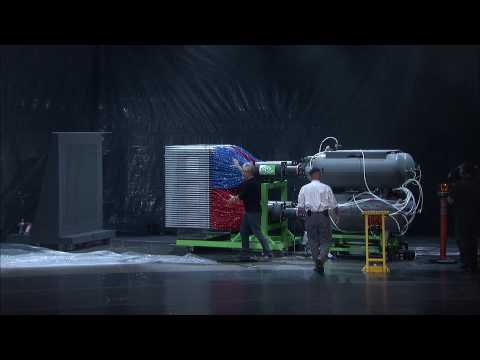

In [99]:
from IPython.display import YouTubeVideo
# a talk about IPython at Sage Days at U. Washington, Seattle.
# Video credit: William Stein.
YouTubeVideo('-P28LKWTzrI')

## Tensor Flow

TensorFlow is a machine learning framework by Google. It offer many advantages, including making it very easy to use a __GPU__ <img src=https://www.youtube.com/watch?v=-P28LKWTzrI />
It does its heavy lifting outside Python, but it takes things a step further to avoid data transfer overhead. Instead of running a single expensive operation independently from Python, TensorFlow lets us describe a graph of interacting operations that run entirely outside Python. (Approaches like this can be seen in a few machine learning libraries.)

We describe these interacting operations by manipulating symbolic variables. We create one using for example:<br>
`x = tf.placeholder(tf.float32, [None, 784])`

To use TensorFlow, first we need to import it. 

In [100]:
# reading data 
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) # utility function provided with TensorFlows


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


THIS...

In [101]:
import tensorflow as tf


x = tf.placeholder(tf.float32, [None, 784])
# x isn't a specific value. It's a placeholder, a value that we'll input when we ask TensorFlow to run a computation.
# We want to be able to input any number of MNIST images, each flattened into a 784-dimensional vector. 
# We represent this as a 2-D tensor of floating-point numbers, with a shape [None, 784]. 
# (Here None means that a dimension can be of any length.)

# we initialize both W and b as tensors full of zeros: 
W = tf.Variable(tf.zeros([784, 10])) # W has a shape of [784, 10] 
b = tf.Variable(tf.zeros([10])) #b has a shape of [10]

y = tf.nn.softmax(tf.matmul(x, W) + b)



<img src=https://www.tensorflow.org/images/softmax-regression-vectorequation.png width="35%" height="35%" />
for brevity, we're showing y1..y3, but in our case we have 10 digits, so it'll be y1..y10 (essentially digits 0 to 9) 

In [102]:
y_ = tf.placeholder(tf.float32, [None, 10])

error = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(error) 

#boiler plate to start tensorflow
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [107]:
from random import randint
    
def test_model():
    num = randint(0, mnist.test.images.shape[0])
    img = mnist.test.images[num]

    classification = sess.run(tf.argmax(y, 1), feed_dict={x: [img]})
    plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)
    plt.show()
    print ('NN predicted', classification[0])
test_model()

THIS.....

In [105]:


for _ in range(550):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    

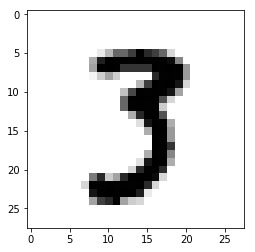

NN predicted 3


In [117]:
test_model()

In [8]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9151
